In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [5]:
df = pd.read_csv(r"C:\Users\PRASAD\Downloads\archive (8)\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# Drop unnecessary columns
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Encode target
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Convert bool to int 
df = df.astype(int)



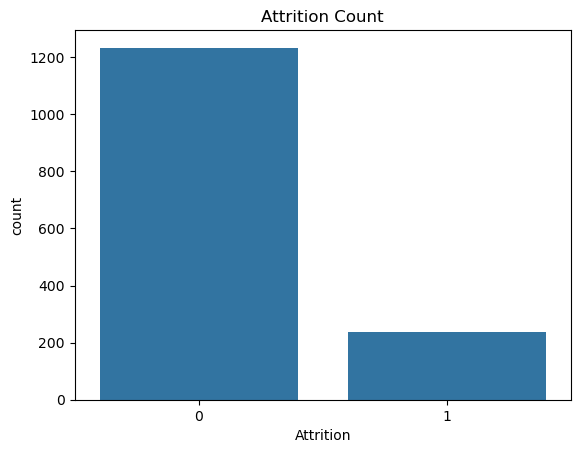

In [9]:
# Attrition count
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()

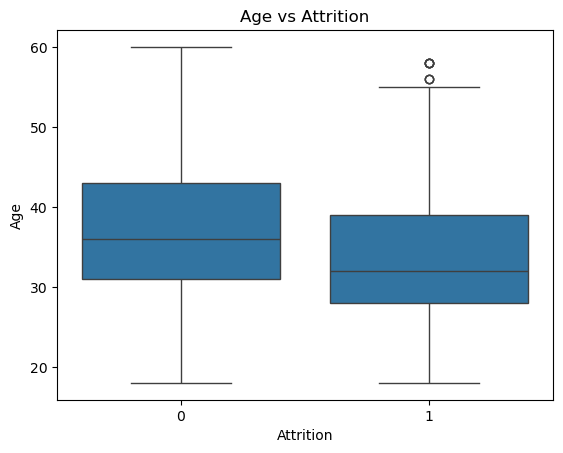

In [13]:
# Age vs Attrition
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Attrition")
plt.show()

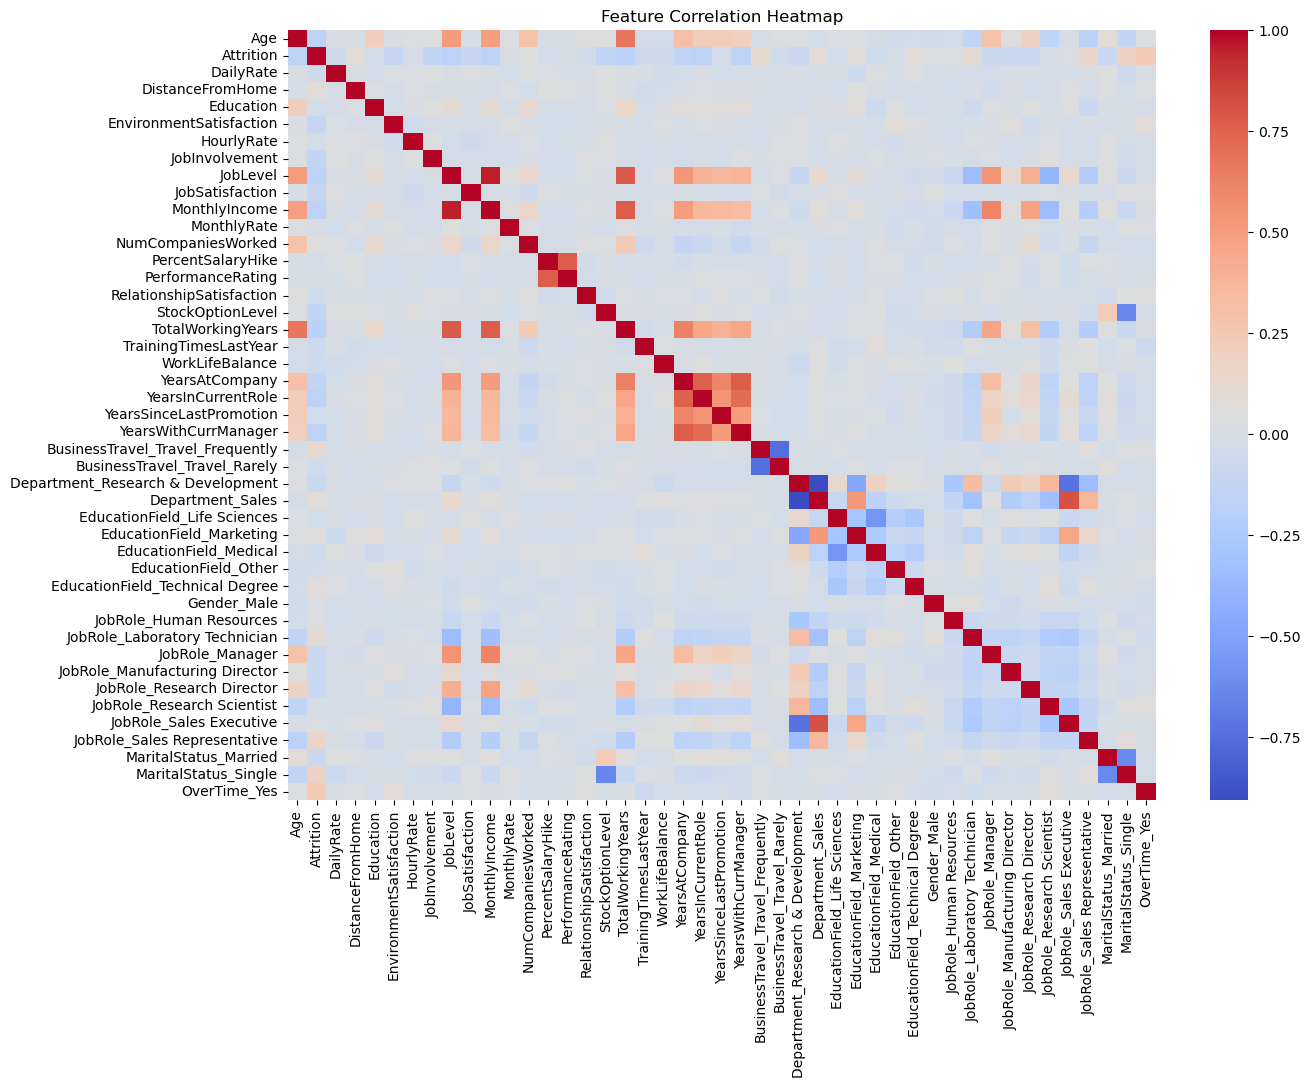

In [15]:
# Correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [21]:
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)


In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7755102040816326
Confusion Matrix:
 [[200  47]
 [ 19  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86       247
           1       0.37      0.60      0.46        47

    accuracy                           0.78       294
   macro avg       0.64      0.70      0.66       294
weighted avg       0.83      0.78      0.79       294



## Conclusion

- Logistic Regression achieved ~82% accuracy.
- Recall for predicting attrition improved from 34% to 60% using SMOTE.
- Precision decreased slightly, but the model is more effective at detecting employees likely to leave.
- This model can support HR decision-making for employee retention.

